# Camera Temparing

## Realtime Plot Chart

/tmp/ipykernel_39216/3712392192.py:11: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  line, = pyplot.plot_date(x_data, y_data, '-')
/tmp/ipykernel_39216/3712392192.py:24: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  animation = FuncAnimation(figure, update, interval=200)


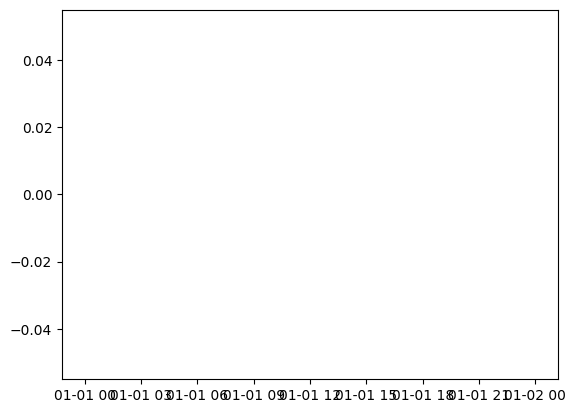

In [1]:
from datetime import datetime
from matplotlib import pyplot
from matplotlib.animation import FuncAnimation
from random import randrange


# Create a figure and a set of subplots
x_data, y_data = [], []

figure = pyplot.figure()
line, = pyplot.plot_date(x_data, y_data, '-')

def extract_frame():
    pass

def update(frame):
    x_data.append(datetime.now())
    y_data.append(randrange(0, 100))
    line.set_data(x_data, y_data)
    figure.gca().relim()
    figure.gca().autoscale_view()
    return line,

animation = FuncAnimation(figure, update, interval=200)

pyplot.show()

### Export video to csv

In [ ]:
import sys
sys.path.append('..')
import cv2
import pandas as pd
from matplotlib import pyplot
from matplotlib.animation import FuncAnimation
from PIL import Image
from src.issue_score import Brightness, Blurriness, Entropy

# Create a video capture object
video = cv2.VideoCapture('/media/tung/New Volume/Ubuntu/Programing/MQ Solutions/Task Data/Data_quality_local/data/cam_shake_vid/dark_issue_1.avi')

# DataFrame to store the scores and times
df = pd.DataFrame(columns=['time', 'blur_score', 'dark_score', 'light_score', 'lowinfor_score'])

while True:
    # Read the next frame from the video
    success, frame = video.read()

    # If the video has ended, break the loop
    if not success:
        break

    img  = Image.fromarray(frame)
    # Calculate the score for the frame
    blur_score = Blurriness().calculate_blurriness_score(img)["score"]
    dark_score = Brightness.calculate_brightness_score(img)['brightness_perc_95']
    light_score = 1 - Brightness.calculate_brightness_score(img)['brightness_perc_5']
    lowinfo_score = Entropy.calc_entropy_score(img)
    # Get the current time of the video in seconds
    current_time = video.get(cv2.CAP_PROP_POS_MSEC) / 1000

    # Append the score and time to the DataFrame
    df = pd.concat([df, pd.DataFrame({'time': [current_time], 'blur_score': [blur_score], 'dark_score': [dark_score], 'light_score' : [light_score], 'lowinfor_score' : [lowinfo_score]})], ignore_index=True)

df.to_csv('/media/tung/New Volume/Ubuntu/Programing/MQ Solutions/Task Data/Data_quality_local/data/cam_shake_vid/dark_issue_1.csv', index=False)

In [ ]:
import sys
#sys.path.append('/media/tung/New Volume/Ubuntu/Programing/MQ Solutions/Task Data/Data_quality_local/')
sys.path.append("..")
import cv2
import pandas as pd
from matplotlib import pyplot
from matplotlib.animation import FuncAnimation
from PIL import Image
from src.issue_score import Brightness, Blurriness, Entropy
from multiprocessing import Pool, cpu_count

# Create a video capture object
video = cv2.VideoCapture('/media/tung/New Volume/Ubuntu/Programing/MQ Solutions/Task Data/Data_quality_local/data/video_cam/vlc-record-2024-04-15-14h21m02s-rtsp___192.168.6.203_554_cam_realmonitor-.avi')


# DataFrame to store the scores and times
df = pd.DataFrame(columns=['time', 'blur_score', 'dark_score', 'light_score', 'lowinfor_score'])

def process_frame(frame):
    img  = Image.fromarray(frame)
    # Calculate the score for the frame
    blur_score = Blurriness().calculate_blurriness_score(img)["score"]
    dark_score = Brightness.calculate_brightness_score(img)['brightness_perc_95']
    light_score = 1 - Brightness.calculate_brightness_score(img)['brightness_perc_5']
    lowinfo_score = Entropy.calc_entropy_score(img)
    # Get the current time of the video in seconds
    current_time = video.get(cv2.CAP_PROP_POS_MSEC) / 1000

    # Return the score and time
    return {'time': current_time, 'blur_score': blur_score, 'dark_score': dark_score, 'light_score' : light_score, 'lowinfor_score' : lowinfo_score}

# Create a pool of processes
with Pool(cpu_count()) as p:
    frames = []
    while True:
        # Read the next frame from the video
        success, frame = video.read()

        # If the video has ended, break the loop
        if not success:
            break

        frames.append(frame)

    # Process all frames in parallel
    results = p.map(process_frame, frames)

    # Append the results to the DataFrame
    df = pd.concat([df, pd.DataFrame(results)], ignore_index=True)

# Release the video capture object
video.release()

### Process multi video to csv

In [ ]:
import sys
#sys.path.append('/media/tung/New Volume/Ubuntu/Programing/MQ Solutions/Task Data/Data_quality_local/')
sys.path.append("..")
import os
import cv2
import pandas as pd
from matplotlib import pyplot
from matplotlib.animation import FuncAnimation
from PIL import Image
from src.issue_score import Brightness, Blurriness, Entropy
from tqdm import tqdm

# Directory containing the videos
video_dir = '/media/tung/New Volume/Ubuntu/Programing/MQ Solutions/Task Data/Data_quality_local/data/gamma3'
# Directory to save the csv files
output_dir = '/home/tung/Documents/testcsv3/'

# Get a list of all files in the video directory
files = os.listdir(video_dir)

# Iterate over all files in the video directory
for filename in tqdm(files, desc="Processing videos"):
    # Check if the file is a video
    if filename.endswith('.'):
        # Create a video capture object
        video = cv2.VideoCapture(os.path.join(video_dir, filename))

        # DataFrame to store the scores and times
        df = pd.DataFrame(columns=['time', 'blur_score', 'dark_score', 'light_score', 'lowinfor_score'])

        while True:
            # Read the next frame from the video
            success, frame = video.read()

            # If the video has ended, break the loop
            if not success:
                break

            img  = Image.fromarray(frame)
            # Calculate the score for the frame
            blur_score = Blurriness().calculate_blurriness_score(img)["score"]
            dark_score = Brightness.calculate_brightness_score(img)['brightness_perc_95']
            light_score = 1 - Brightness.calculate_brightness_score(img)['brightness_perc_5']
            lowinfo_score = Entropy.calc_entropy_score(img)
            # Get the current time of the video in seconds
            current_time = video.get(cv2.CAP_PROP_POS_MSEC) / 1000

            # Append the score and time to the DataFrame
            df = pd.concat([df, pd.DataFrame({'time': [current_time], 'blur_score': [blur_score], 'dark_score': [dark_score], 'light_score' : [light_score], 'lowinfor_score' : [lowinfo_score]})], ignore_index=True)

        # Save the DataFrame to a csv file
        df.to_csv(os.path.join(output_dir, f'{os.path.splitext(filename)[0]}.csv'), index=False)

### Visualize realtime plot chart


In [ ]:
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

# Load the data from the CSV file
df = pd.read_csv('data/video_cam/scores.csv')

# Reopen the video for playback
video = cv2.VideoCapture('data/video_cam/vlc-record-2024-04-15-14h21m02s-rtsp___192.168.6.203_554_cam_realmonitor-.avi')

figure, ax = plt.subplots()

# Create 4 lines for the 4 scores
lines = {
    'blur_score': ax.plot([], [], '-', color='red', label='Blur Score')[0],
    'dark_score': ax.plot([], [], '-', color='green', label='Dark Score')[0],
    'light_score': ax.plot([], [], '-', color='blue', label='Light Score')[0],
    'lowinfor_score': ax.plot([], [], '-', color='yellow', label='Low Information Score')[0],
}

def update(i):
    # Get the data from the DataFrame
    x_data = df['time'][:i+1]

    # Update the plot data for each line
    for score_name, line in lines.items():
        y_data = df[score_name][:i+1]
        line.set_data(x_data, y_data)

    # Redraw the plot
    ax.relim()
    ax.autoscale_view()
    return lines.values(),

# Calculate the interval for the animation
total_frames = len(df)
total_time_ms = 35 * 1000  # 35 seconds in milliseconds
interval = total_time_ms / total_frames

animation = FuncAnimation(figure, update, frames=len(df), interval=interval)

# Add a legend
ax.legend()

#Play the video in a separate window
while True:
    success, frame = video.read()
    if not success:
        break
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video.release()
cv2.destroyAllWindows()

plt.show()


## Find insight of Data

### Add gamma to video

Đoạn mã này điều chỉnh độ sáng (gamma) của từng khung hình trong một video và lưu các video đã điều chỉnh vào thư mục data/gamma3/ với tên file là giá trị gamma tương ứng.

In [ ]:
import cv2
import numpy as np

def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0)**invGamma)*255
        for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

for g in [0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 2]:
    cap = cv2.VideoCapture('/home/tung/Videos/test3.mp4')
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    out = cv2.VideoWriter(f'data/gamma3/{g}.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))
    for i in range(length):
        ret, frame = cap.read()
        if not ret:
            break
        frame = adjust_gamma(frame, g)
        out.write(frame)

    out.release()
    cap.release()
cv2.destroyAllWindows()

In [ ]:
start_frame = 100  # start of the bright section
end_frame = 200  # end of the bright section

for g in [0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 2]:
    cap = cv2.VideoCapture('/home/tung/Videos/test3.mp4')
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    out = cv2.VideoWriter(f'data/gamma3/{g}.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))
    for i in range(length):
        ret, frame = cap.read()
        if not ret:
            break
        if start_frame <= i <= end_frame:  # if the frame is in the bright section
            frame = adjust_gamma(frame, 0.5)  # decrease gamma to increase brightness
        out.write(frame)

    out.release()
    cap.release()
cv2.destroyAllWindows()

### Detect tampering issue


Đoạn mã này bao gồm hai hàm: calc_threshold() và dark_detect().

calc_threshold(vals, bins_num = 100): Hàm này nhận vào một mảng giá trị và số lượng bins cho histogram. Nó tính toán ngưỡng tối ưu dựa trên phương pháp Otsu, một phương pháp phân cấp ảnh dựa trên histogram. Hàm này trả về giá trị ngưỡng tối ưu.

dark_detect(t, scores): Hàm này nhận vào một mảng thời gian t và một mảng điểm số scores. Nó tính gradient của scores (đạo hàm của scores theo thời gian), sau đó đặt tất cả các giá trị gradient không âm thành 0. Hàm sau đó tính toán ngưỡng tối ưu cho gradient sử dụng hàm calc_threshold(), và trả về các chỉ số thời gian mà tại đó gradient nhỏ hơn ngưỡng. Điều này có thể được hiểu là việc tìm các khung hình tối trong video, nơi mà giá trị scores giảm một cách đáng kể.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

def calc_threshold(vals, bins_num = 100):
    """
    Funtion to get the threshold value for the dark detection
    """
    # Get the image histogram
    hist, bin_edges = np.histogram(vals, bins=bins_num)
    
    # Calculate centers of bins
    bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.
    
    # Iterate over all thresholds (indices) and get the probabilities w1(t), w2(t)
    weight1 = np.cumsum(hist)
    weight2 = np.cumsum(hist[::-1])[::-1]
    
    # Get the class means mu0(t)
    mean1 = np.cumsum(hist * bin_mids) / weight1
    # Get the class means mu1(t)
    mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]
    
    inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
    
    # Maximize the inter_class_variance function val
    index_of_max_val = np.argmax(inter_class_variance)
    
    threshold = bin_mids[:-1][index_of_max_val]
    return threshold

def dark_detect(t, scores):
    """
    Function to detect the dark frames in the video
    """
    scores = np.cumsum(scores)
    d_scores = np.gradient(scores)
    threshold = calc_threshold(d_scores)
    idxs = np.where(d_scores < threshold)[0]
    return t[idxs]

In [ ]:
df = pd.read_csv('/media/tung/New Volume/Ubuntu/Programing/MQ Solutions/Task Data/Data_quality_local/data/cam_shake_vid/dark_issue_2.csv')
dark_times = dark_detect(df['time'], df['dark_score'].values)
print(dark_times)

### Using Log 

In [ ]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

import math
from pathlib import Path
from typing import Tuple

from src.issue_score import Brightness, Blurriness, Entropy

matplotlib.use('Qt5Agg')
plt.ion()  # turning interactive mode on

average_data = []
x_time_column = []

# plotting the first frame
figure, ax = plt.subplots(figsize=(10, 8))

average_line, = ax.plot([], [], color='red', label='Average line')

# setting title
plt.title("Camera Tempering", fontsize=20)

# setting x-axis label and y-axis label
plt.ylim([0, 1])
ax.set_yticks(np.arange(0, 1., 0.025))
plt.xlabel("Frame idx")
plt.ylabel("Metric Value")
plt.grid()
plt.legend()

# Create a video capture object
video_path = 'data/cam_shake_vid/dark_issue_1.avi'
video_name = Path(video_path).stem
video = cv2.VideoCapture(video_path)
cv2.namedWindow("frame", cv2.WINDOW_NORMAL)
cv2.resizeWindow("frame", 1000, 700)
frame_idx = 0
warm_up = True


def calc_image_quality(image: Image) -> Tuple[float, float, float]:
    image = Image.fromarray(image)

    blur_score = Blurriness().calculate_blurriness_score(image)["score"]
    dark_score = (
        Brightness.calculate_brightness_score(image)['brightness_perc_95'])
    light_score = (
        1 - Brightness.calculate_brightness_score(image)['brightness_perc_5'])
    low_info_score = Entropy.calc_entropy_score(image)

    return blur_score, dark_score, light_score, low_info_score


# Warm up
success, frame = video.read()
if not success:
    raise Exception("Error when read video stream")

prev_frame = frame
prev_blur_score, prev_dark_score, prev_light_score, prev_low_info_score = calc_image_quality(frame)

while True:
    # Read the next frame from the video
    success, frame = video.read()

    # If the video has ended, break the loop
    if not success:
        break

    if frame_idx % 5 == 0:
        # Calculate the score for the frame
        blur_score, dark_score, light_score, low_info_score = calc_image_quality(frame)

        average_value = (
            abs(math.log(blur_score / prev_blur_score)) +
            abs(math.log(dark_score / prev_dark_score)) +
            abs(math.log(light_score / prev_light_score)) +
            abs(math.log(low_info_score / prev_low_info_score))
        ) / 4
        if average_value > 0.025:
            print("Save log")
            image = np.hstack((prev_frame, frame))
            cv2.imwrite(f"data/results/{video_name}_{frame_idx}_{average_value*100:.1f}.jpg", image)
        average_data.append(average_value)
        x_time_column.append(frame_idx)

        prev_frame = frame
        prev_blur_score, prev_dark_score, prev_light_score, prev_low_info_score = blur_score, dark_score, light_score, low_info_score

        average_line.set_xdata(x_time_column)
        average_line.set_ydata(average_data)

        # drawing updated values
        figure.gca().relim()
        figure.gca().autoscale_view()
        figure.canvas.draw()
        figure.canvas.flush_events()

    frame_idx += 1
    cv2.imshow("frame", frame)
    ch = cv2.waitKey(20)
    if ch == 27 or ch == ord("q") or ch == ord("Q"):
        break

# Convert Matplotlib figure to PIL Image
figure.canvas.draw()
buf = figure.canvas.tostring_rgb()
width, height = figure.canvas.get_width_height()
pil_image = Image.frombytes("RGB", (width, height), buf)

# Save PIL Image as PNG
pil_image.save('pil_image_save.png')

video.release()
cv2.destroyAllWindows()


In [ ]:
import pandas as pd
import numpy as np
import math

# Đọc dữ liệu từ tệp CSV
df = pd.read_csv('/media/tung/New Volume/Ubuntu/Programing/MQ Solutions/Task Data/Data_quality_local/data/cam_shake_vid/blur_issue_1.csv')

# Lấy giá trị trước đó của mỗi cột
df_prev = df.shift(1)

# Áp dụng công thức cho mỗi cột
for col in ['blur_score', 'dark_score', 'light_score', 'lowinfor_score']:
    df[col] = df[col].combine(df_prev[col], lambda x, prev: abs(math.log(x / prev)) if prev else 0)

# In DataFrame sau khi đã được xử lý
print(df)

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/media/tung/New Volume/Ubuntu/Programing/MQ Solutions/Task Data/Data_quality_local/data/cam_shake_vid/blur_issue_1.csv')
# Tính log ratio và lấy giá trị tuyệt đối
for col in ['blur_score', 'dark_score', 'light_score', 'lowinfor_score']:
    df[f'{col}_log_ratio'] = abs(np.log(df[col] / df[col].shift(5)))
# Hiển thị DataFrame mới
print(df[['time', 'blur_score_log_ratio', 'dark_score_log_ratio', 'light_score_log_ratio', 'lowinfor_score_log_ratio']])
df.to_csv('/media/tung/New Volume/Ubuntu/Programing/MQ Solutions/Task Data/Data_quality_local/blur_issue_1.csv', index=False)

In [ ]:
from sklearn.linear_model import LinearRegression

# Giả sử df là DataFrame của bạn chứa các cột x, y, z, t và `abnormal` là nhãn bất thường
X = df[['x', 'y', 'z', 't']]
y = df['abnormal']  # Nhãn bất thường

# Khởi tạo và huấn luyện mô hình
model = LinearRegression()
model.fit(X, y)

# Lấy các hệ số
A, B, C, D = model.coef_
T = model.intercept_

print("Model coefficients: A =", A, ", B =", B, ", C =", C, ", D =", D)
print("Model intercept (T):", T)
